# Introduction

Since its inaugural season in 2015, the Louisville City Football Club (LCFC) has consistently been in the Top 3 in average attendance in the United Soccer League (USL).  LCFC has maintained a winning record for its first three full seasons. Also, they advanced to the Eastern Conference Final for all three seasons, winning the USL Cup in 2017.


My Question: Does Louisville City’s performance affect immediate attendance? To find out, I pulled the 2017 and 2018 (up to June 16th) attendance and match results from USL’s website to determine this. I looked at both their win percentage  and their non-losses (wins and draws) percentage to see if there is any correlation?

I start by importing SQLite, Pandas, and matplotlib libraries.


In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Sorting the Data

I started with an Excel table of game data that I converted to .csv. Below is a display of the data that, using SQLite.

In [10]:
attendance_df = pd.read_csv('./csv/LCFC_Game_Data_SQL_modified.csv')
attendance_df.head()

,Date,Venue,Attendance,LCFCGoals,OpponentGoals,Opponent,Win,Draw,Loss,WIN_PRCT,NONLOSS_PRCT
0,2017-03-25,Slugger Field,6758,0,0,St. Louis FC,19,9,5,57.575758,84.848485
1,2017-03-30,Orlando City Stadium,2741,3,1,Orlando City B,0,1,0,0.000000,100.000000
2,2017-04-08,City Stadium,7603,1,0,Richmond Kickers,1,1,0,50.000000,100.000000
3,2017-04-15,Slugger Field,9074,2,1,Tampa Bay Rowdies,2,1,0,66.666667,100.000000
4,2017-04-22,Nippert Stadium,20437,1,1,FC Cincinnati,3,1,0,75.000000,100.000000


## Win Percentage

I used Jupyter notebook to connect to my SQL database, then created a table comprised of attendance figures and cumulative win percentage, filtering only LCFC's home games. With this table I was able to create a scatterplot graph.


In [11]:
con = sqlite3.connect("LCFC_Attend_DB.db")
attendance_by_win_df = pd.read_sql_query("""SELECT Attendance, WIN_PRCT FROM LCFC_Game_Data
                            WHERE Venue = 'Slugger Field'""", con)
attendance_by_win_df.head()

,Attendance,WIN_PRCT
0,6758,57.575758
1,9074,66.666667
2,8282,60.000000
3,7403,44.444444
4,8741,54.545455


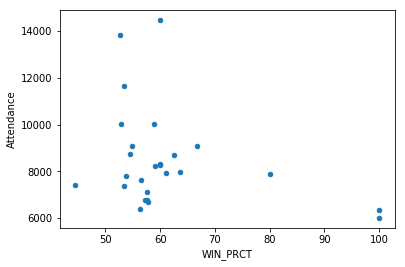

In [12]:
attendance_by_win_df.plot.scatter(x="WIN_PRCT", y="Attendance")
plt.savefig('Attend_by_wins.png')

## Non-loss percentage

In this step, I created a similar table as before. This time, the cumulative percentage includes draws in the regular season. Once again, I created a scatterplot using only data from home games.

In [13]:
con = sqlite3.connect("LCFC_Attend_DB.db")
attendance_by_nonloss_df = pd.read_sql_query("""SELECT Attendance, NONLOSS_PRCT FROM LCFC_Game_Data 
                            WHERE Venue = 'Slugger Field'""", con)
attendance_by_nonloss_df.head()

,Attendance,NONLOSS_PRCT
0,6758,84.848485
1,9074,100.000000
2,8282,100.000000
3,7403,77.777778
4,8741,81.818182


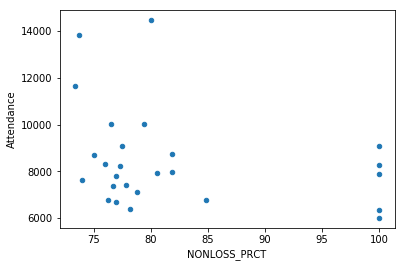

In [14]:
attendance_by_nonloss_df.plot.scatter(x="NONLOSS_PRCT", y="Attendance")
plt.savefig('Attend_by_nonlosses.png')

## Conclusion

With the exception of some undefeated streaks at the beginning of seasons, the percentages usually hang in the 55 – 75% range, While attendance fluctuates between 6,000 to 9,000. The results do not seem to correlate to past performance. The high attendance outliers are the USL Championship game and rivalry games with FC Cincinnati (the increase is attributed to hype of the rivalry and travelling FCC supporters). Also there are a couple of outliers at 100% win rate but the attendance is at the low end of the graph. These games were played at the beginning of the season when the weather was colder.  High profile games, local rivalries and weather appear to be more of impact to attendance rather than the team’s performance. Also, weekend games versus weekday games were another factor that was not seen in these graphs
